<a href="https://colab.research.google.com/github/ganeevsingh18/Rl_assignment/blob/main/RL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. For the following sequence calculate the estimates of the expected reward for all
arms.

i) Using Sample Mean

ii) Using Exponential Weighted Average (alpha = 0.1)


Initial Values
Q1(arm1) = 5
Q1(arm2) = 8
Q1(arm3) = -6
Q1(arm4)= 0


Sequence
Action: 2, 3, 4, 4, 1, 2, 3, 3, 1
Reward: -5, 9, 5, 2, -4, 9, 10, 2, 1


Is the sample mean affected by the choice of initial Q values?
Try to prove mathematically: The dependency of both i) and ii) on the initial Q value.

In [ ]:


def update_sample_mean(arr,index,reward):
  index-=1

  arr[index][0]=(arr[index][0]*arr[index][1]+reward)/(arr[index][1]+1)
  arr[index][1]+=1
  return arr

def update_ewa(arr,index,reward,alpha=0.1):
  index-=1
  arr[index][0] = (1 - alpha)*arr[index][0] + alpha*reward
  return arr

Q=[[5,0],[8,0],[-6,0],[0,0]]

sequences=[[2,-5],[3,9],[4,5],[4,2],[1,-4],[2,9],[3,10],[3,2],[1,1]]

#part1
M_arms=Q
for li in sequences:
  arm=li[0]
  reward=li[1]
  M_arms=update_sample_mean(M_arms,arm,reward)

for i in range(len(M_arms)):
  print(i+1,M_arms[i][0])
print("\n")

#part2

E_arms=Q
for li in sequences:
  arm=li[0]
  reward=li[1]
  E_arms=update_ewa(E_arms,arm,reward)

for i in range(len(E_arms)):
  print(i+1,E_arms[i][0])
print("\n")
#Q[i][0] means Q of (i+1)st arm
#Q[i][1] means number of times arm i+1 has been picked




1 -1.5
2 2.0
3 7.0
4 3.5


1 -1.4749999999999999
2 2.0700000000000003
3 6.932
4 3.4850000000000003




2.  Using epsilon-greedy, generate an episode for 1000 time steps. [Python]
Action Space: {1,2,3,4}
Distribution of Rewards Associated with each Arm: {N(0,1), N(0,0.7), N(0, 0.2), N(0.2, 0.5)}
Use Sample mean as the estimate for e-greedy selection.
i) epsilon= 0.2
ii) epsilon= 0.8
iii) epsilon= 0
iv) epsilon= 1
v) Take epsilon to be a function of time, such that it decreases as t increases.
Plot the Rewards that you get at every time step in all 5 cases.
What is the average reward for each epsilon?
## Here, we are not averaging over runs. If you want to try doing that, then generate a sequence
corresponding to an ‘epsilon’ multiple times (say 1000) and then take the average over those
1000 runs for a single time step. [See Next Question]

Reward for each arm [0.04060301923312007, 0.09071361821327421, 0.00953772674390951, 0.183673838796467]


Average reward for 0.2 is 0.08113205074669269 



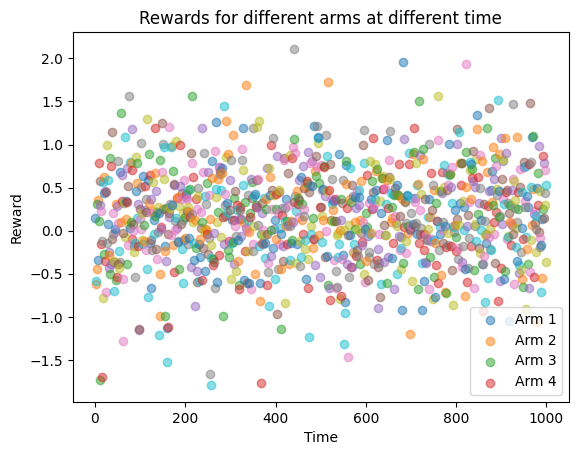

Reward for each arm [-0.044142953000983406, 0.01239340674324751, -0.007224885321536378, 0.1880985404774466]


Average reward for 0.8 is 0.03728102722454358 



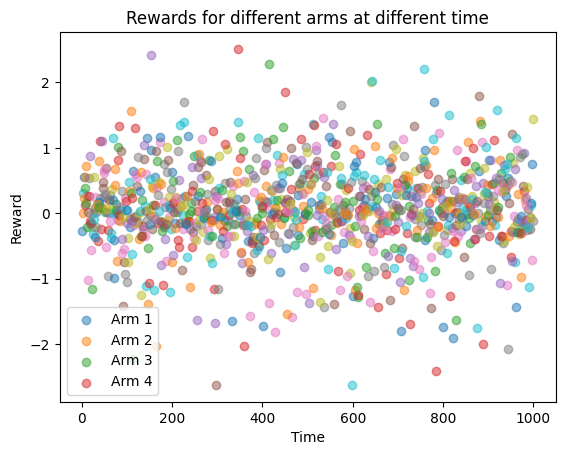

Reward for each arm [-0.15703669059262962, -0.1024117600067289, -0.013455805264546974, -0.11452836567920238]


Average reward for 0 is -0.09685815538577697 



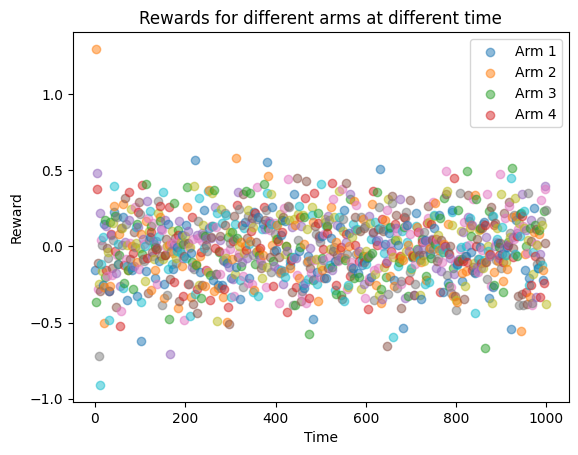

Reward for each arm [-0.003232652161859726, 0.014610773328960448, 0.004179747905721583, 0.2761643043124462]


Average reward for 1 is 0.07293054334631713 



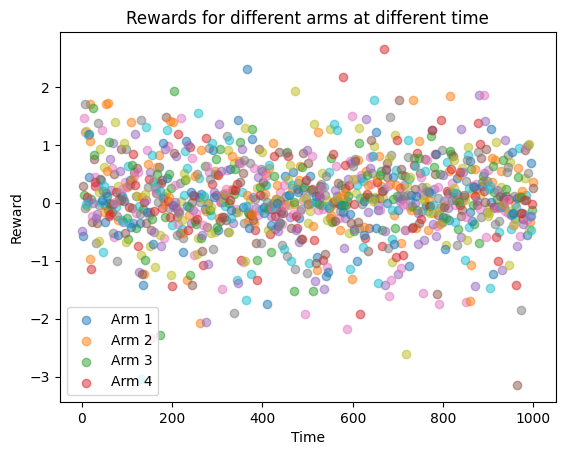

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_reward(data_lists):
  for data in data_lists:
    for li in data:
      values, indices = li[0],li[1]
      plt.scatter(indices, values, marker='o', alpha=0.5)

  plt.xlabel('Time')
  plt.ylabel('Reward')
  plt.title('Rewards for different arms at different time')
  plt.legend(['Arm 1', 'Arm 2', 'Arm 3', 'Arm 4'])
  plt.show()


def find_max(arr):
  # arr is the array of Q, arr[i]->Q[i]
  # i could also use a arr[t+1][arms] but I have chode arr[arms] which updates for every t
  max=arr[0]
  index=1
  for i in range(len(arr)):
    if arr[i]>max:
      max=arr[i]
      index=i+1
  return index


def pmf(values,probabilities):
  random_value = np.random.choice(values, p=probabilities)
  return random_value

def expected_reward(mean,deviation):
  reward=np.random.normal(mean,deviation)
  return reward

def epsilon_greedy(arr,epsilon):
  argmax_Q=find_max(arr)
  argmax_Q-=1
  probabilities=[epsilon/len(arr)]*len(arr)
  probabilities[argmax_Q]+=1-epsilon
  values=[i+1 for i in range(len(arr))]
  return pmf(values,probabilities)



def finalQ(steps,epsilon):
  fn=[[0,1],[0,0.7],[0,0.2],[0.2,0.5]]
  Q=[0]*4
  n=[0]*4
  data=[[] for _ in range(4)]



  def update_sample_mean(index,reward):
    index-=1
    Q[index]=(Q[index]*n[index]+reward)/(n[index]+1)
    n[index]+=1

  for i in range(steps):
    arm=epsilon_greedy(Q,epsilon)
    reward=expected_reward(fn[arm-1][0],fn[arm-1][1])
    update_sample_mean(arm,reward)
    # print(arm-1)
    data[arm-1].append([reward,i+1])
  print(f'Reward for each arm {Q}\n')
  print(f'\nAverage reward for {epsilon} is {sum(Q)/len(Q)} \n')
  plot_reward(data)

finalQ(1000,0.2)
finalQ(1000,0.8)
finalQ(1000,0)
finalQ(1000,1)




3. 10- armed tesbed with variance of each arm as 1

In [ ]:
# I am given k-Bandit Algorithm, I have to use it: find expected reward of the model over time
# Plot these expected reward with time

import numpy as np

def create_fn(n,std=1):
  arr=[]
  values = np.random.normal(0,1,n)
  for val in values:
    arr.append([val,std])
  return arr

def optimal_arm(arr):
  index=1
  maxi=arr[0][0]
  for i in range(len(arr)):
    if(arr[i][0]>maxi):
      maxi=arr[i][0]
      index=i+1
  return index

def expected_rewards(bandits,steps,epsilon,std):

  fn=create_fn(bandits,std)
  op=optimal_arm(fn)

  Q=[0]*bandits
  n=[0]*bandits
  data=[[] for _ in range(bandits)]
  reward_array=[]
  optimal_array=[]

  def update_sample_mean(index,reward):
    index-=1
    Q[index]=(Q[index]*n[index]+reward)/(n[index]+1)
    n[index]+=1

  def update_reward_array(reward):
    if len(reward_array)==0:
      t1=0
    else:
      t1=reward_array[len(reward_array)-1]
    reward_array.append((t1*len(reward_array)+reward)/(len(reward_array)+1))

  def update_optimal_aray(arm):
    temp=0
    if(arm==op):
      temp=1

    if(len(optimal_array)==0):
      optimal_array.append(temp)
      return

    optimal_array.append(optimal_array[-1]+temp)

  for i in range(steps):
    arm=epsilon_greedy(Q,epsilon)
    reward=expected_reward(fn[arm-1][0],fn[arm-1][1])
    update_sample_mean(arm,reward)
    update_reward_array(reward)
    update_optimal_aray(arm)
    # print(arm-1)
    data[arm-1].append([reward,i+1])

  op_array_percentage = [x*100 / (i + 1) for i, x in enumerate(optimal_array)]
  return np.array(reward_array), np.array(op_array_percentage)



def mean_expected_rewards(bandits,mean_steps,steps,epsilon,std):
  expected_reward=[]
  optimal_percentage=[]
  for i in range(mean_steps):
    ex,op=expected_rewards(bandits,steps,epsilon,std)
    expected_reward.append(ex)
    optimal_percentage.append(op)
  return np.mean(np.array(expected_reward),axis=0),np.mean(np.array(optimal_percentage),axis=0)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_arrays(array1, array2, array3):
    indices = np.arange(len(array1))

    plt.plot(indices, array1, label='epsilon=0', color='blue')
    plt.plot(indices, array2, label='epsilon=0.1', color='green')
    plt.plot(indices, array3, label='epsilon=0.01', color='red')

    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


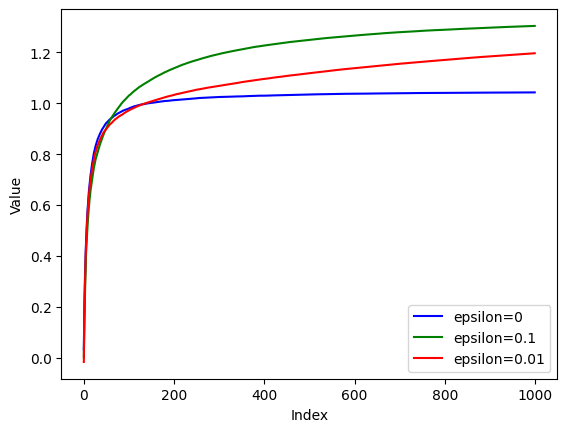

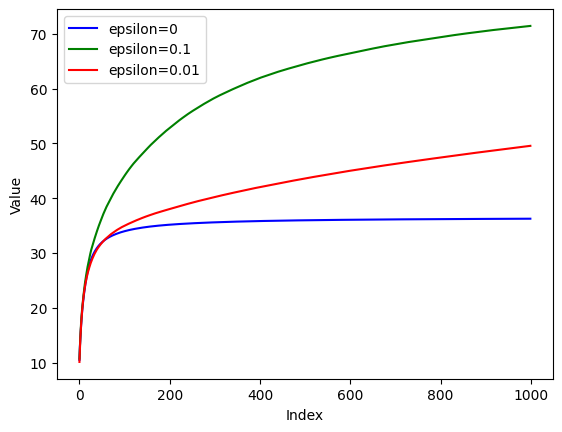

In [ ]:
average_reward1,optimal_action1 =mean_expected_rewards(10,2000,1000,0,1);
average_reward2,optimal_action2 =mean_expected_rewards(10,2000,1000,0.1,1);
average_reward3,optimal_action3 =mean_expected_rewards(10,2000,1000,0.01,1);

plot_arrays(average_reward1,average_reward2,average_reward3)
plot_arrays(optimal_action1,optimal_action2,optimal_action3)
# array=mean_expected_rewards(2000,1000,0.2);
# mean_axis_0 = np.mean(array, axis=0)

4. 10- Arm testbed with arm variance 4 (standard deviation 2)

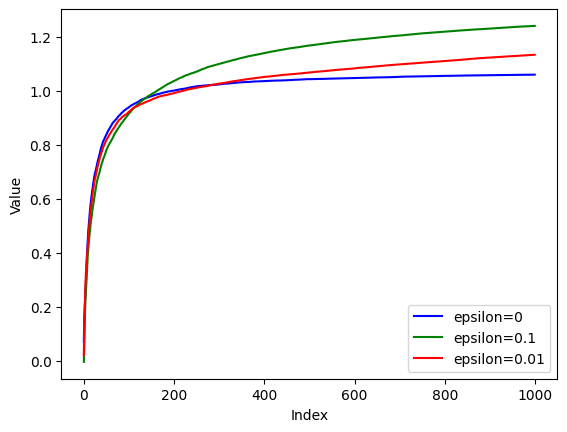

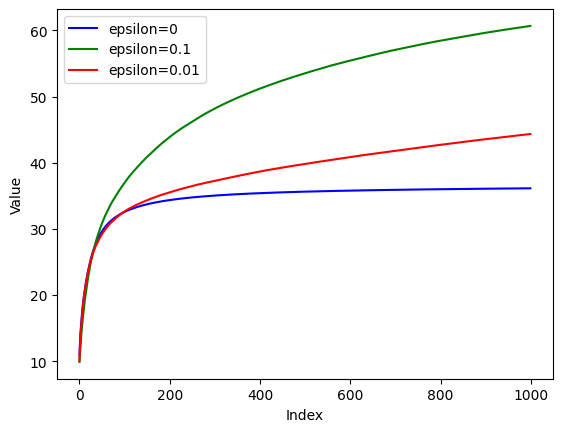

In [ ]:
average_reward4, optimal_action4 = mean_expected_rewards(10, 2000, 1000, 0, 2)
average_reward5, optimal_action5 = mean_expected_rewards(10, 2000, 1000, 0.1, 2)
average_reward6, optimal_action6 = mean_expected_rewards(10, 2000, 1000, 0.01, 2)

plot_arrays(average_reward4, average_reward5, average_reward6)
plot_arrays(optimal_action4, optimal_action5, optimal_action6)

In [ ]:
import math
def UCB(arr,epsilon,n,t,c):
  temp=[]
  for i in range(len(arr)):
    temp.append(arr[i] + c*math.sqrt(math.log(t)/(n[i]+1e-6)) )
  argmax_Q=find_max(temp)
  argmax_Q-=1
  probabilities=[epsilon/len(arr)]*len(arr)
  probabilities[argmax_Q]+=1-epsilon
  values=[i+1 for i in range(len(arr))]
  return pmf(values,probabilities)

In [ ]:
def expected_rewards_UCB(bandits,steps,epsilon,std,c):

  fn=create_fn(bandits,std)
  op=optimal_arm(fn)

  Q=[0]*bandits
  n=[0]*bandits
  data=[[] for _ in range(bandits)]
  reward_array=[]
  optimal_array=[]

  def update_sample_mean(index,reward):
    index-=1
    Q[index]=(Q[index]*n[index]+reward)/(n[index]+1)
    n[index]+=1

  def update_reward_array(reward):
    if len(reward_array)==0:
      t1=0
    else:
      t1=reward_array[len(reward_array)-1]
    reward_array.append((t1*len(reward_array)+reward)/(len(reward_array)+1))

  def update_optimal_aray(arm):
    temp=0
    if(arm==op):
      temp=1

    if(len(optimal_array)==0):
      optimal_array.append(temp)
      return

    optimal_array.append(optimal_array[-1]+temp)

  for i in range(steps):
    arm=UCB(Q,epsilon,n,i+1,c)
    reward=expected_reward(fn[arm-1][0],fn[arm-1][1])
    update_sample_mean(arm,reward)
    update_reward_array(reward)
    update_optimal_aray(arm)
    # print(arm-1)
    data[arm-1].append([reward,i+1])

  op_array_percentage = [x*100 / (i + 1) for i, x in enumerate(optimal_array)]
  return np.array(reward_array), np.array(op_array_percentage)


In [ ]:
def mean_expected_rewards_UCB(bandits,mean_steps,steps,epsilon,std,c):
  expected_reward=[]
  optimal_percentage=[]
  for i in range(mean_steps):
    ex,op=expected_rewards_UCB(bandits,steps,epsilon,std,c)
    expected_reward.append(ex)
    optimal_percentage.append(op)
  return np.mean(np.array(expected_reward),axis=0),np.mean(np.array(optimal_percentage),axis=0)

In [ ]:
average_reward7, optimal_action7 = mean_expected_rewards_UCB(10, 2000, 1000, 0.1, 1,2)

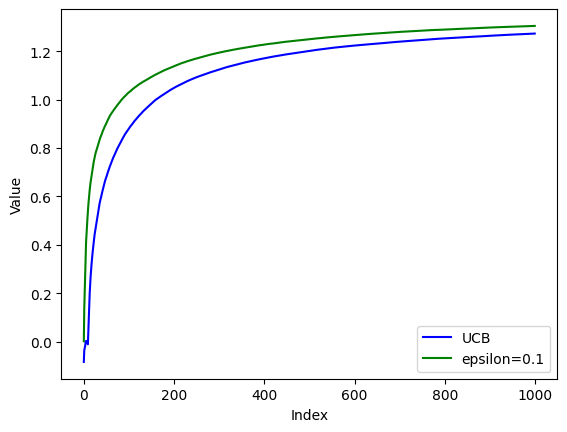

In [ ]:
indices = np.arange(len(average_reward7))

plt.plot(indices, average_reward7, label='UCB', color='blue')
plt.plot(indices, average_reward2, label='epsilon=0.1', color='green')


plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


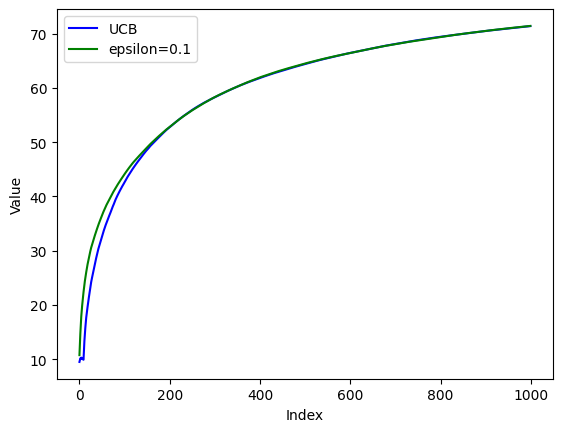

In [ ]:
plt.plot(indices, optimal_action7, label='UCB', color='blue')
plt.plot(indices, optimal_action2, label='epsilon=0.1', color='green')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

EXERCISE 2.8 : WHY there is a spike in 11th step?

the UCB uses the following fn At=argmax(Qt(a)+ c*root(log(t)/Nt(a)))

initially Nt(a) is 0 for all arms and hence all arms have an upper confidence bound of infinity. Only when an arm has been explored: its confidence changes. So we pick the non optimal arms till we have explored all arms atleast once

So in UCB algorithm its highly probable that there will be a spike at time k+1. which in the 10-testbed case is the 11th step

----------BANDIT GRADIENT---------

5. Bandit Gradient Algorithm: Generate figure 2.5 (Average over 2000 trials to
remove noise).

In [ ]:
import numpy as np

def expected_reward(mean,deviation):
  reward=np.random.normal(mean,deviation)
  return reward


def create_fn(n,mean,std=1):
  arr=[]
  values = np.random.normal(mean,1,n)
  for val in values:
    arr.append([val,std])
  return arr

def optimal_arm(arr):
  index=1
  maxi=arr[0][0]
  for i in range(len(arr)):
    if(arr[i][0]>maxi):
      maxi=arr[i][0]
      index=i+1
  return index

def softmax(action_preferences, tau=1.0):
  exp_preferences = np.exp(action_preferences / tau)
  action_probabilities = exp_preferences / np.sum(exp_preferences)

    # Handle NaN values and ensure a valid probability distribution
  action_probabilities = np.nan_to_num(action_probabilities, nan=1.0/len(action_preferences))
  action_probabilities /= np.sum(action_probabilities)  # Re-normalize

  return action_probabilities


def bandit_gradient(bandits,steps,epsilon,alpha,mean,std,baseline=False):


  fn=create_fn(bandits,mean,std)
  op=optimal_arm(fn)

  Q=[0]*bandits
  n=[0]*bandits


  H = np.zeros(bandits)

  data=[[] for _ in range(bandits)]
  reward_array=[]
  optimal_array=[]

  mean_reward=0

  def update_sample_mean(index,reward):
    index-=1
    Q[index]=(Q[index]*n[index]+reward)/(n[index]+1)
    n[index]+=1

  def update_reward_array(reward):
    if len(reward_array)==0:
      t1=0
    else:
      t1=reward_array[len(reward_array)-1]
    reward_array.append((t1*len(reward_array)+reward)/(len(reward_array)+1))

  def update_optimal_aray(arm):
    temp=0
    if(arm==op):
      temp=1

    if(len(optimal_array)==0):
      optimal_array.append(temp)
      return

    optimal_array.append(optimal_array[-1]+temp)

  for i in range(steps):

    #pick arm
    action_probabilities = softmax(H)
    arm = np.random.choice(np.arange(bandits), p=action_probabilities)
    arm+=1

    reward=expected_reward(fn[arm-1][0],fn[arm-1][1])
    mean_reward=mean_reward + (1/(i+1))*(reward-mean_reward)

    if(baseline):
      baseline_value=mean_reward
    else:
      baseline_value=0

    #update Ht
    for j in range(len(H)):
      if(j==arm-1):
        H[j] += alpha * (reward - baseline_value) * (1 - action_probabilities[j])
      else:
        H[j] -= alpha * (reward - baseline_value) * (action_probabilities[j])


    update_sample_mean(arm,reward)
    update_reward_array(reward)
    update_optimal_aray(arm)
    # print(arm-1)
    data[arm-1].append([reward,i+1])

  op_array_percentage = [x*100 / (i + 1) for i, x in enumerate(optimal_array)]
  return np.array(reward_array), np.array(op_array_percentage)

In [ ]:
def mean_expected_rewards_gradient(bandits,mean_steps,steps,epsilon,aplha,mean,std,baseline):
  expected_reward=[]
  optimal_percentage=[]
  for i in range(mean_steps):
    ex,op=bandit_gradient(bandits,steps,epsilon,aplha,mean,std,baseline)
    expected_reward.append(ex)
    optimal_percentage.append(op)
  return np.mean(np.array(expected_reward),axis=0),np.mean(np.array(optimal_percentage),axis=0)

In [ ]:

average_reward8,optimal_action8=mean_expected_rewards_gradient(10,2000,1000,0.01,0.1,4,1,True)
average_reward9,optimal_action9=mean_expected_rewards_gradient(10,2000,1000,0.01,0.1,4,1,False)

average_reward10,optimal_action10=mean_expected_rewards_gradient(10,2000,1000,0.01,0.4,4,1,True)
average_reward11,optimal_action11=mean_expected_rewards_gradient(10,2000,1000,0.01,0.4,4,1,False)



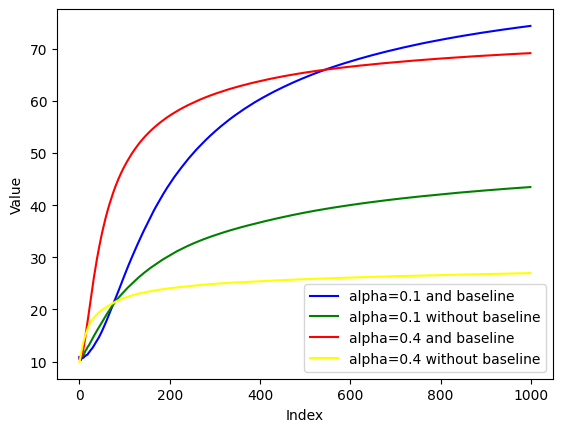

In [ ]:
indices = np.arange(len(optimal_action8))

plt.plot(indices, optimal_action8, label='alpha=0.1 and baseline', color='blue')
plt.plot(indices, optimal_action9, label='alpha=0.1 without baseline', color='green')
plt.plot(indices, optimal_action10, label='alpha=0.4 and baseline', color='red')
plt.plot(indices, optimal_action11, label='alpha=0.4 without baseline', color='yellow')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()